In [1]:
import warnings

from opticalglass.glass import get_filepath

import opticalglass as og
import opticalglass.buchdahl as buchdahl
import opticalglass.glass as ogl
from opticalglass.glassfactory import create_glass
from opticalglass import sumita

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Build Multi-Index for Sumita

In [2]:
catalog = 'Sumita'
gname = 'K-CaFK95'
gname1 = 'K-SK16'
gname2 = 'K-FIR100UV'

In [3]:
cat_pd = sumita.SumitaCatalog()
cat_df = cat_pd.df

In [4]:
cat_df

category   abbe number             NaN          refractive indices           \
data item           vd     ve    nF-nC  nF'-nC'             1548.0   1309.0   
glass                                                                         
K-CaFK95          95.0   94.4  0.00457  0.00461            1.42562  1.42706   
K-PFK80           81.5   80.9   0.0061  0.00616            1.48591  1.48768   
K-PFK85           85.2   84.7   0.0057  0.00575            1.47546  1.47705   
K-PFK90           90.0   89.5   0.0051  0.00514            1.44941  1.45094   
K-GFK68           68.3   68.0  0.00867  0.00874            1.57817  1.58014   
...                ...    ...      ...      ...                ...      ...   
K-BOC30           26.2   26.0  0.03845   0.0391            1.95576  1.96107   
K-GIR79           33.0   32.8  0.02601   0.0264            1.82418  1.82768   
K-GIR140          43.1   42.8  0.01743  0.01765            1.72651  1.72913   
K-FIR98UV         97.8   97.4  0.00435  0.00438            1.41742  1.41869   
K-FIR100UV       101.0  100.5   0.0041  0.00413            1.40621  1.40748   

category                                        ...          NaN  \
data item         t       A'        r        C  ... abs-40/-20_g   
glass                                           ...                
K-CaFK95    1.42898  1.43121  1.43203  1.43285  ...         -6.9   
K-PFK80     1.49007  1.49299  1.49406  1.49514  ...         -7.2   
K-PFK85     1.47924  1.48191   1.4829  1.48389  ...         -8.3   
K-PFK90     1.45299  1.45545  1.45635  1.45724  ...         -7.6   
K-GFK68     1.58301  1.58684   1.5883  1.58978  ...        -10.4   
...             ...      ...      ...      ...  ...          ...   
K-BOC30     1.97003  1.98396  1.98975  1.99575  ...          2.5   
K-GIR79     1.83378  1.84344  1.84745  1.85161  ...          8.3   
K-GIR140    1.73354  1.74029  1.74306  1.74591  ...          4.5   
K-FIR98UV   1.42041   1.4225  1.42327  1.42404  ...         -6.5   
K-FIR100UV  1.40917  1.41118  1.41191  1.41264  ...         -6.3   

category                                                               \
data item  abs-0/+20_1548.1 abs-0/+20_d abs-0/+20_g abs+40/+60_1548.1   
glass                                                                   
K-CaFK95               -7.4        -7.2        -6.9              -7.6   
K-PFK80                -7.7        -7.5        -7.1              -7.8   
K-PFK85                -9.0        -8.8        -8.5              -9.0   
K-PFK90                -8.4        -8.3        -8.0              -8.4   
K-GFK68               -11.1       -10.8       -10.3             -10.9   
...                     ...         ...         ...               ...   
K-BOC30                -1.2         1.3         5.6              -0.7   
K-GIR79                 4.7         7.3        10.9               5.2   
K-GIR140                3.0         4.7         7.0               3.2   
K-FIR98UV              -7.1        -6.9        -6.7              -7.3   
K-FIR100UV             -6.7        -6.5        -6.3              -6.7   

category                                    \
data item  abs+40/+60_d abs+40/+60_g    PF   
glass                                        
K-CaFK95           -7.3         -7.0     A   
K-PFK80            -7.6         -7.2     B   
K-PFK85            -8.8         -8.4     C   
K-PFK90            -8.2         -8.0     C   
K-GFK68           -10.6        -10.1     A   
...                 ...          ...   ...   
K-BOC30             2.0          6.7  <NA>   
K-GIR79             8.0         11.8  <NA>   
K-GIR140            5.1          7.5     C   
K-FIR98UV          -7.1         -6.8     B   
K-FIR100UV         -6.5         -6.2  <NA>   

category                                                 
data item                                  Memo Remarks  
glass                                                    
K-CaFK95    Optical Glass for Precision Molding    <NA>  
K-PFK80     Optical Glass for Precision 

In [5]:
cat_df.columns.has_duplicates

False

In [6]:
nd = cat_df['refractive indices']['d'].to_numpy(dtype=float)
nF = cat_df['refractive indices']['F'].to_numpy(dtype=float)
nC = cat_df['refractive indices']['C'].to_numpy(dtype=float)

In [7]:
nd, coefs = buchdahl.calc_buchdahl_coords(nd, nF, nC)

In [8]:
coefs /= np.array((nd - 1.0), dtype=float)

## Test Series extracted from DataFrame

In [9]:
gla = cat_df.loc[gname]
gla1 = cat_df.loc[gname1]

In [10]:
cat_df.loc[gname]['dispersion coefficients']

data item
A0    2.040823
A1   -0.004547
A2    0.005863
A3     0.00013
A4   -0.000012
A5    0.000001
Name: K-CaFK95, dtype: object

In [11]:
gla['dispersion coefficients']

data item
A0    2.040823
A1   -0.004547
A2    0.005863
A3     0.00013
A4   -0.000012
A5    0.000001
Name: K-CaFK95, dtype: object

In [12]:
coefs = gla['dispersion coefficients'].to_numpy(dtype=float); coefs

array([ 2.0408226e+00, -4.5471403e-03,  5.8631038e-03,  1.2966471e-04,
       -1.1902639e-05,  6.9279944e-07])

In [13]:
coefs[3]

0.00012966471

In [14]:
cat_df.loc[gname]['internal transmission mm, 10']

data item
270.0      <NA>
280.0      <NA>
290.0     0.022
300.0     0.103
310.0     0.288
320.0     0.534
330.0     0.739
340.0     0.871
350.0     0.935
360.0     0.968
370.0     0.989
380.0     0.993
390.0     0.995
400.0     0.998
420.0     0.998
440.0     0.998
460.0     0.998
480.0     0.998
500.0     0.998
550.0     0.998
600.0     0.998
650.0     0.998
700.0     0.998
800.0     0.998
1060.0    0.998
1500.0    0.998
2000.0    0.998
Name: K-CaFK95, dtype: object

In [15]:
cat_df.loc[gname]['refractive indices'].array

<PandasArray>
[1.42562, 1.42706, 1.42898, 1.43121, 1.43203, 1.43285, 1.43308, 1.43422,
 1.43425, 1.43535, 1.43742, 1.43769, 1.43986, 1.44187, 1.44523]
Length: 15, dtype: object

## Test factory method, create_glass

In [16]:
gla2 = create_glass(gname2, catalog)

In [17]:
wvls = gla2.glass_data()['refractive indices'].index; wvls

Index([1548.0, 1309.0,    't',   'A'',    'r',    'C',   'C'',    'D',    'd',
          'e',    'F',   'F'',    'g',    'h',    'i'],
      dtype='object', name='data item')

In [18]:
for w_str in wvls:
    n_line = gla2.meas_rindex(w_str)
    try:
        n_intrp = gla2.rindex(w_str)
    except KeyError:
        print(f'{w_str}: {n_line}, Key error')
    else:
        print(f'{w_str}: {n_line}, {n_intrp:9.6f}, {n_intrp-n_line:8.2g}')

1548.0: 1.40621,  1.406211,  5.6e-07
1309.0: 1.40748,  1.407476, -3.7e-06
t: 1.40917,  1.409174,  4.5e-06
A': 1.41118,  1.411183,  3.2e-06
r: 1.41191,  1.411914,  4.2e-06
C: 1.41264,  1.412637, -3.3e-06
C': 1.41284,  1.412838,   -2e-06
D: 1.41386,  1.413860,   -2e-07
d: 1.4139,  1.413897, -3.4e-06
e: 1.41488,  1.414877, -2.9e-06
F: 1.41674,  1.416742,  1.8e-06
F': 1.41697,  1.416973,  2.7e-06
g: 1.41893,  1.418933,  2.8e-06
h: 1.42073,  1.420730,    2e-07
i: 1.42375,  1.423749,   -1e-06


In [19]:
gla2.meas_rindex(wvls).array

<PandasArray>
[1.40621, 1.40748, 1.40917, 1.41118, 1.41191, 1.41264, 1.41284, 1.41386,
  1.4139, 1.41488, 1.41674, 1.41697, 1.41893, 1.42073, 1.42375]
Length: 15, dtype: object

In [20]:
gla2.rindex(wvls)

array([1.40621056, 1.40747631, 1.40917445, 1.41118318, 1.41191424,
       1.4126367 , 1.41283801, 1.4138598 , 1.41389655, 1.41487707,
       1.41674184, 1.4169727 , 1.41893279, 1.4207302 , 1.42374896])

In [21]:
gla2.meas_rindex(wvls).array-gla2.rindex(wvls)

<PandasArray>
[ -5.614623550531661e-07,  3.6860497070190235e-06,  -4.453922197056315e-06,
  -3.179506982586844e-06,  -4.237148023333859e-06,   3.304840454187996e-06,
  1.9934190789161477e-06,  1.9585142085887242e-07,  3.4451935084778285e-06,
   2.932003050348797e-06,  -1.840592371404881e-06,  -2.698760724895166e-06,
 -2.7894561822616737e-06, -2.0392499799903874e-07,  1.0353717054822908e-06]
Length: 15, dtype: object

In [22]:
cat_df.loc[gname]['specific gravity']['d']

3.54

In [23]:
cat_df.loc[gname]['chemical properties']

data item
RW     2
RA     4
DW     1
B     BB
Name: K-CaFK95, dtype: object

In [24]:
cat_df.loc[gname]['thermal properties']

data item
Tg                  431
At                  450
Low-Range       -30/+70
a-Low               129
High-Range    +100/+300
a-High              167
Th                0.796
Cp                  730
Name: K-CaFK95, dtype: object

In [25]:
cat_df.loc[gname]['mechanical properties']

data item
HK       331
HKL        3
HV       348
Ha       500
E        718
G        279
PO     0.287
Name: K-CaFK95, dtype: object

In [26]:
cat_df.loc[[gname, gname1]]['mechanical properties']['HK']

glass
K-CaFK95    331
K-SK16      490
Name: HK, dtype: Int64

In [27]:
cat_df.loc[gname1]['internal transmission mm, 10']

data item
270.0      <NA>
280.0      <NA>
290.0      <NA>
300.0     0.014
310.0     0.118
320.0     0.297
330.0     0.525
340.0     0.675
350.0     0.801
360.0      0.87
370.0      0.91
380.0      0.94
390.0     0.954
400.0     0.964
420.0     0.964
440.0     0.971
460.0     0.971
480.0     0.975
500.0     0.978
550.0     0.978
600.0     0.989
650.0     0.989
700.0     0.992
800.0     0.996
1060.0    0.996
1500.0    0.996
2000.0    0.937
Name: K-SK16, dtype: object

In [28]:
cat_df['refractive indices']['d'].array

<FloatingArray>
[1.43425,   1.497, 1.48563,  1.4588,  1.5924, 1.56907,  1.5176,  1.5225,
  1.5274,   1.525,
 ...
 1.72825, 1.78472, 1.76182,  1.8467,  1.8467,  2.0068,  1.8592, 1.75106,
 1.42537,  1.4139]
Length: 134, dtype: Float64

In [29]:
trns_data = cat_df.loc[[gname, gname1]]['internal transmission mm, 10'].T; trns_data

glass,K-CaFK95,K-SK16
data item,,
270.0,<NA>,<NA>
280.0,<NA>,<NA>
290.0,0.022,<NA>
300.0,0.103,0.014
310.0,0.288,0.118
320.0,0.534,0.297
330.0,0.739,0.525
340.0,0.871,0.675
350.0,0.935,0.801


<AxesSubplot:xlabel='data item'>

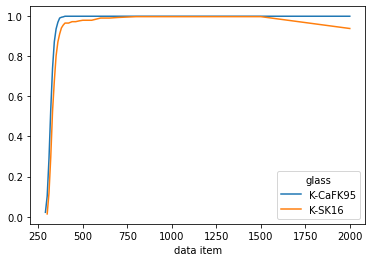

In [30]:
trns_data.plot()

<AxesSubplot:xlabel='data item'>

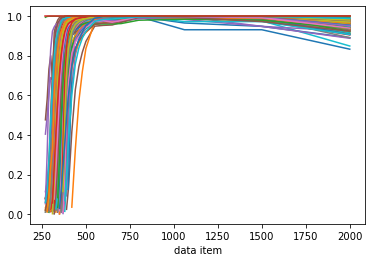

In [31]:
cat_df['internal transmission mm, 10'].T.plot(legend=False)

In [32]:
gla_v2 = sumita.SumitaGlass(gname)

In [33]:
gla_v2.meas_rindex('F')

1.43742

In [34]:
gla_v2.glass_code()

'434.95'